In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("co_GTR_R4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          2.9268 ( 2.3108,  3.2967) ( 2.3819,  3.3477)  0.9658 (Jnode 142)\n',
 't_n74          2.8459 ( 2.2079,  3.2276) ( 2.2838,  3.2902)  1.0064 (Jnode 141)\n',
 't_n75          2.5337 ( 1.9131,  2.9162) ( 1.9421,  2.9361)  0.9940 (Jnode 140)\n',
 't_n76          2.4590 ( 1.8504,  2.8444) ( 1.8600,  2.8520)  0.9920 (Jnode 139)\n',
 't_n77          2.1875 ( 1.6381,  2.5627) ( 1.6454,  2.5687)  0.9233 (Jnode 138)\n',
 't_n78          2.1017 ( 1.5751,  2.4695) ( 1.5682,  2.4615)  0.8933 (Jnode 137)\n',
 't_n79          1.8223 ( 1.4043,  2.1610) ( 1.3988,  2.1547)  0.7560 (Jnode 136)\n',
 't_n80          1.5672 ( 1.2502,  1.8806) ( 1.2434,  1.8717)  0.6284 (Jnode 135)\n',
 't_n81          1.4198 ( 1.1456,  1.7101) ( 1.1328,  1.6930)  0.5603 (Jnode 134)\n',
 't_n82          1.2410 ( 1.0126,  1.5089) ( 0.9975,  1.4854)  0.4879 (Jnode 133)\n',
 't_n83          1.1690 ( 0.9569,  1.4331) ( 0.9366,  1.4018)  0.4652 (Jnode 132)\n',
 't_n84          1.1024 ( 0.9021,  1.3651) ( 0.8798,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[2.9268,
 2.8459,
 2.5337,
 2.459,
 2.1875,
 2.1017,
 1.8223,
 1.5672,
 1.4198,
 1.241,
 1.169,
 1.1024,
 0.9805,
 0.6891,
 0.57,
 0.2567,
 0.0948,
 0.7108,
 0.6041,
 0.6638,
 1.4091,
 0.9744,
 0.2332,
 0.9064,
 0.8454,
 0.594,
 2.0047,
 1.939,
 1.9039,
 1.854,
 1.7928,
 1.5643,
 0.9939,
 1.5938,
 1.3167,
 1.2083,
 0.6698,
 1.2165,
 0.5661,
 1.5944,
 1.3975,
 1.0851,
 0.82,
 0.5615,
 1.2354,
 0.8039,
 0.7792,
 0.4568,
 0.1754,
 1.3086,
 1.2185,
 1.1632,
 1.1453,
 1.106,
 0.982,
 1.0915,
 0.7005,
 1.0997,
 1.0551,
 1.0205,
 0.8967,
 0.6371,
 0.3012,
 0.6047,
 0.8999,
 1.6128,
 1.1317,
 0.7088,
 1.5364,
 0.9892,
 0.4745]

In [7]:
lower_ci_iqtree

[2.3108,
 2.2079,
 1.9131,
 1.8504,
 1.6381,
 1.5751,
 1.4043,
 1.2502,
 1.1456,
 1.0126,
 0.9569,
 0.9021,
 0.7995,
 0.5447,
 0.4314,
 0.1394,
 0.0445,
 0.2642,
 0.1977,
 0.2333,
 1.1379,
 0.5994,
 0.0724,
 0.527,
 0.5185,
 0.4834,
 1.5037,
 1.4535,
 1.4284,
 1.3912,
 1.3469,
 1.1581,
 0.5267,
 1.2,
 0.9715,
 0.8851,
 0.435,
 0.8853,
 0.2658,
 1.2036,
 1.0524,
 0.7801,
 0.5338,
 0.3064,
 0.8373,
 0.4483,
 0.3809,
 0.113,
 0.0344,
 1.0708,
 1.0037,
 0.9591,
 0.9436,
 0.9094,
 0.7617,
 0.8962,
 0.4568,
 0.9054,
 0.8669,
 0.8373,
 0.7234,
 0.4769,
 0.1859,
 0.4893,
 0.6778,
 1.3046,
 0.879,
 0.5191,
 1.2441,
 0.6076,
 0.3023]

In [8]:
upper_ci_iqtree

[3.2967,
 3.2276,
 2.9162,
 2.8444,
 2.5627,
 2.4695,
 2.161,
 1.8806,
 1.7101,
 1.5089,
 1.4331,
 1.3651,
 1.2464,
 0.9244,
 0.7878,
 0.4241,
 0.1769,
 1.0355,
 0.9306,
 0.9898,
 1.6986,
 1.3251,
 0.5969,
 1.2699,
 1.2329,
 0.6646,
 2.3695,
 2.3014,
 2.2661,
 2.2152,
 2.1477,
 1.9283,
 1.4467,
 1.9195,
 1.6112,
 1.5024,
 0.9724,
 1.5088,
 0.8731,
 1.9359,
 1.7255,
 1.3904,
 1.1108,
 0.8298,
 1.6605,
 1.3022,
 1.304,
 1.0618,
 0.5742,
 1.5848,
 1.4768,
 1.416,
 1.3966,
 1.3561,
 1.2506,
 1.3414,
 1.0473,
 1.3462,
 1.2959,
 1.258,
 1.1345,
 0.8832,
 0.5187,
 0.6662,
 1.1759,
 1.8315,
 1.4432,
 1.1351,
 1.7343,
 1.4922,
 0.5694]

In [9]:
file_LG = open("co_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

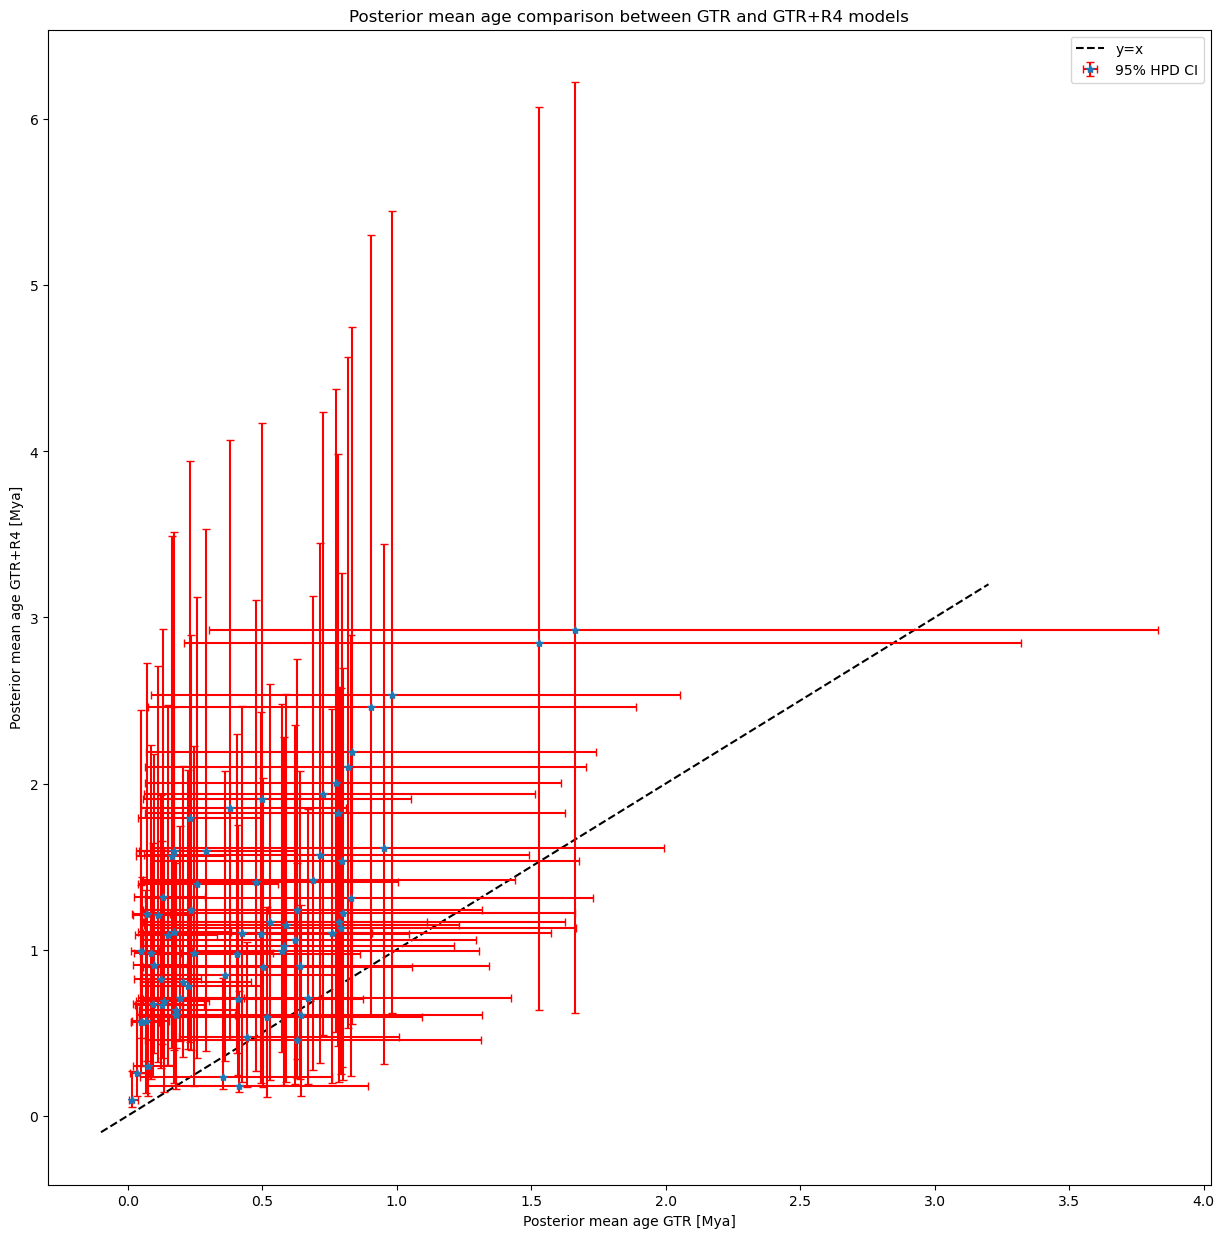

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_R4.png')

In [11]:
posterior_mean_baseml

[1.6643,
 1.5303,
 0.9805,
 0.9048,
 0.8344,
 0.8173,
 0.7803,
 0.7153,
 0.6901,
 0.6304,
 0.5291,
 0.4254,
 0.2442,
 0.1343,
 0.0666,
 0.0343,
 0.0161,
 0.1924,
 0.1774,
 0.1257,
 0.4754,
 0.4059,
 0.3552,
 0.0971,
 0.3617,
 0.5154,
 0.7734,
 0.7271,
 0.4983,
 0.3801,
 0.2291,
 0.1653,
 0.0505,
 0.1713,
 0.13,
 0.1102,
 0.0922,
 0.0713,
 0.0523,
 0.2896,
 0.2577,
 0.1499,
 0.1227,
 0.0502,
 0.2349,
 0.2054,
 0.2238,
 0.6275,
 0.4125,
 0.8307,
 0.7995,
 0.7833,
 0.5862,
 0.1703,
 0.0851,
 0.4936,
 0.4088,
 0.7576,
 0.6224,
 0.5799,
 0.5016,
 0.1779,
 0.0759,
 0.644,
 0.6415,
 0.9534,
 0.7922,
 0.6699,
 0.7977,
 0.5721,
 0.4437]

In [12]:
posterior_mean_iqtree

[2.9268,
 2.8459,
 2.5337,
 2.459,
 2.1875,
 2.1017,
 1.8223,
 1.5672,
 1.4198,
 1.241,
 1.169,
 1.1024,
 0.9805,
 0.6891,
 0.57,
 0.2567,
 0.0948,
 0.7108,
 0.6041,
 0.6638,
 1.4091,
 0.9744,
 0.2332,
 0.9064,
 0.8454,
 0.594,
 2.0047,
 1.939,
 1.9039,
 1.854,
 1.7928,
 1.5643,
 0.9939,
 1.5938,
 1.3167,
 1.2083,
 0.6698,
 1.2165,
 0.5661,
 1.5944,
 1.3975,
 1.0851,
 0.82,
 0.5615,
 1.2354,
 0.8039,
 0.7792,
 0.4568,
 0.1754,
 1.3086,
 1.2185,
 1.1632,
 1.1453,
 1.106,
 0.982,
 1.0915,
 0.7005,
 1.0997,
 1.0551,
 1.0205,
 0.8967,
 0.6371,
 0.3012,
 0.6047,
 0.8999,
 1.6128,
 1.1317,
 0.7088,
 1.5364,
 0.9892,
 0.4745]

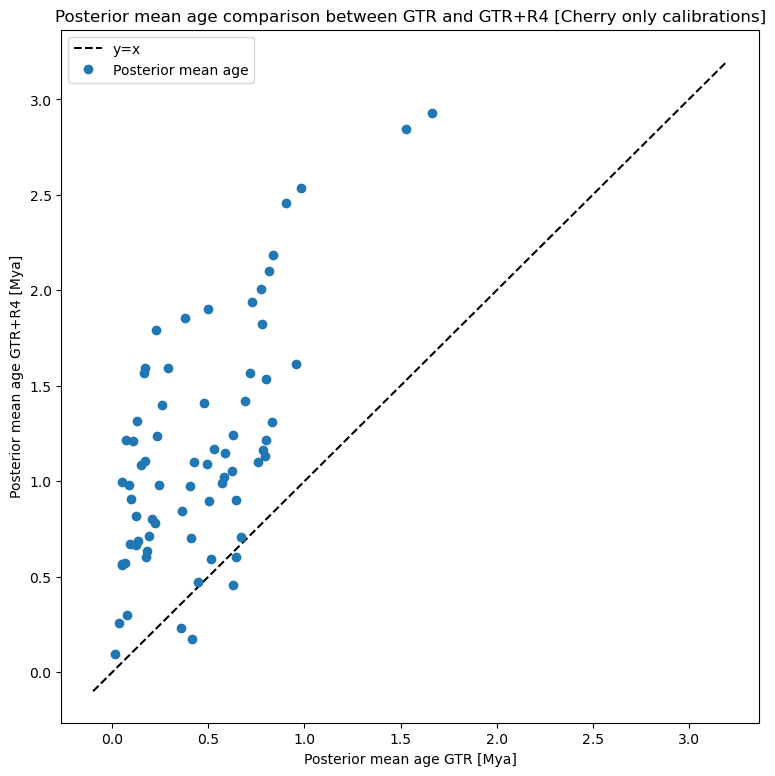

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_R4_scatter.png')

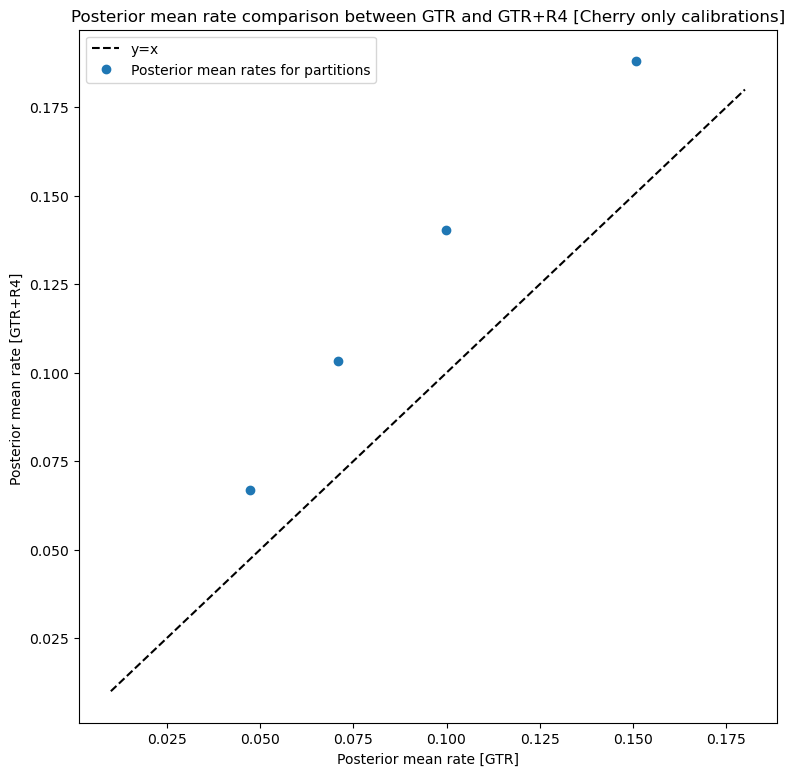

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+R4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+R4 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_rate_comparison_GTR_R4_all_scatter.png')